Author: Pascal, `pascal@bayesimpact.org`

Updated: `2018-06-14`

# BMO across Years

BMO means "Besoin en Main d'Oeuvre" and analyzes the working force needed (it is done by calling employers all over France). It's done once per year. See the [official website](http://bmo.pole-emploi.org/) for more details.

In Bob Emploi we want to display BMO data useful for the user. One way we want to show some context is to give the values for several years. Before doing that we want to make sure that no user would get surprised by the data for their specific case.

In [1]:
import glob
import os
from os import path
import re

import pandas
import seaborn as sns
sns.set()

bmo_file_names = glob.glob(path.join(os.getenv('DATA_FOLDER'), 'bmo/bmo_*'))
bmo_df_dict = {}
for bmo_file_name in sorted(bmo_file_names):
    df = pandas.read_csv(bmo_file_name, dtype={'DEPARTEMENT_CODE': str})
    year = int(re.search(r'\d+', bmo_file_name).group())
    df['year'] = year
    bmo_df_dict[year] = df
    
sorted(bmo_df_dict.keys())

[2014, 2015, 2016, 2017, 2018]

Check that all the CSV files have the same structure.

In [2]:
def assert_all_the_same(dataframes, select_data_func, name='Values'):
    first = None
    for key, df in sorted(dataframes.items(), key=lambda kv: kv[0]):
        if first is None:
            first = select_data_func(df)
            continue
        other = select_data_func(df)
        if first - other:
            print('{} removed in {}:\n{}'.format(name, key, sorted(first - other)))
        if other - first:
            print('{} added in {}:\n{}'.format(name, key, sorted(other - first)))

assert_all_the_same(bmo_df_dict, lambda df: set(df.columns), name='Columns')

Columns removed in 2015:
['ROME_PROFESSION_CARD_CODE', 'ROME_PROFESSION_CARD_NAME']
Columns added in 2015:
['FAP_CODE', 'FAP_NAME']
Columns removed in 2016:
['ROME_PROFESSION_CARD_CODE', 'ROME_PROFESSION_CARD_NAME']
Columns added in 2016:
['FAP_CODE', 'FAP_NAME']
Columns removed in 2017:
['ROME_PROFESSION_CARD_CODE', 'ROME_PROFESSION_CARD_NAME']
Columns added in 2017:
['FAP_CODE', 'FAP_NAME']
Columns removed in 2018:
['ROME_PROFESSION_CARD_CODE', 'ROME_PROFESSION_CARD_NAME']
Columns added in 2018:
['FAP_CODE', 'FAP_NAME']


Hmm, this is fishy, why would the BMO be by ROME? Let's check the values:

In [3]:
bmo_df_dict[2014].ROME_PROFESSION_CARD_CODE.unique()

array(['A0Z40', 'A0Z41', 'Q2Z90', 'V2Z91', 'R4Z93', 'D2Z41', 'A0Z42',
       'A1Z40', 'U1Z81', 'A0Z43', 'V2Z90', 'B6Z70', 'A1Z41', 'D1Z40',
       'L1Z60', 'A1Z42', 'A2Z90', 'A3Z40', 'B2Z40', 'A2Z70', 'A3Z41',
       'A3Z90', 'B0Z20', 'B0Z21', 'B2Z43', 'B2Z44', 'D2Z42', 'B1Z40',
       'V2Z93', 'E1Z42', 'W0Z80', 'Q2Z91', 'B2Z41', 'B2Z42', 'B4Z41',
       'B3Z20', 'B6Z72', 'M2Z92', 'B4Z44', 'B6Z71', 'B4Z43', 'G1Z80',
       'B7Z91', 'B4Z42', 'B5Z40', 'C0Z20', 'D0Z20', 'B6Z73', 'D4Z41',
       'D6Z70', 'G0B40', 'U0Z80', 'D2Z40', 'B7Z90', 'C2Z70', 'D3Z20',
       'C1Z40', 'H0Z91', 'J3Z43', 'D1Z41', 'C2Z71', 'C2Z80', 'E1Z41',
       'E0Z20', 'D6Z80', 'E0Z22', 'E0Z23', 'E0Z24', 'E0Z21', 'E1Z43',
       'G0A40', 'D6Z71', 'L2Z60', 'D4Z40', 'F3Z41', 'E1Z40', 'E2Z80',
       'F0Z20', 'E1Z46', 'E1Z47', 'F4Z20', 'G0A41', 'E2Z70', 'F1Z41',
       'F4Z41', 'F1Z40', 'F5Z70', 'F2Z20', 'E1Z44', 'G0A42', 'G0B41',
       'H0Z92', 'G0A43', 'G1Z70', 'M0Z60', 'L2Z61', 'L5Z90', 'L3Z80',
       'H0Z90', 'J0Z

OK, those are actually the FAP code, so we only need some columns renaming.

In [4]:
for df in bmo_df_dict.values():
    df.rename(columns={
            'ROME_PROFESSION_CARD_CODE': 'FAP_CODE',
            'ROME_PROFESSION_CARD_NAME': 'FAP_NAME',
        }, inplace=True)
assert_all_the_same(bmo_df_dict, lambda df: set(df.columns), name='Columns')

Let's check the column types:

In [5]:
for column in bmo_df_dict[2017].columns:
    assert_all_the_same(
        bmo_df_dict,
        lambda df: set([df.dtypes[column]]),
        name='Column Type for {}'.format(column))

Column Type for NB_DIFF_RECRUT_PROJECTS removed in 2015:
[dtype('O')]
Column Type for NB_DIFF_RECRUT_PROJECTS added in 2015:
[dtype('float64')]
Column Type for NB_DIFF_RECRUT_PROJECTS removed in 2016:
[dtype('O')]
Column Type for NB_DIFF_RECRUT_PROJECTS added in 2016:
[dtype('float64')]
Column Type for NB_RECRUT_PROJECTS removed in 2015:
[dtype('O')]
Column Type for NB_RECRUT_PROJECTS added in 2015:
[dtype('float64')]
Column Type for NB_RECRUT_PROJECTS removed in 2016:
[dtype('O')]
Column Type for NB_RECRUT_PROJECTS added in 2016:
[dtype('float64')]
Column Type for NB_SEASON_RECRUT_PROJECTS removed in 2015:
[dtype('O')]
Column Type for NB_SEASON_RECRUT_PROJECTS added in 2015:
[dtype('float64')]
Column Type for NB_SEASON_RECRUT_PROJECTS removed in 2016:
[dtype('O')]
Column Type for NB_SEASON_RECRUT_PROJECTS added in 2016:
[dtype('float64')]


Ouch, those numbers should all be floats not objects. Let's check some values:

In [6]:
bmo_df_dict[2014].NB_RECRUT_PROJECTS.head()

0    39,27177888
1    97,19287631
2             85
3    152,0641712
4    170,6651188
Name: NB_RECRUT_PROJECTS, dtype: object

In [7]:
for field in ('NB_RECRUT_PROJECTS', 'NB_DIFF_RECRUT_PROJECTS', 'NB_SEASON_RECRUT_PROJECTS'):
    for bmo_df in bmo_df_dict.values():
        bmo_df[field] = bmo_df[field].astype(str)\
            .str.replace(',', '.', regex=False)\
            .str.replace(' ', '', regex=False)\
            .replace('-', '0')\
            .replace('*', '0')\
            .astype(float)
bmo_df_dict[2014].NB_RECRUT_PROJECTS.head()

0     39.271779
1     97.192876
2     85.000000
3    152.064171
4    170.665119
Name: NB_RECRUT_PROJECTS, dtype: float64

After this cleanup, let's check again if the column types are consistant.

In [8]:
for column in bmo_df_dict[2017].columns:
    assert_all_the_same(
        bmo_df_dict,
        lambda df: set([df.dtypes[column]]),
        name='Column Type for {}'.format(column))

Cool, now column types are the same for each year.

Let's check if we have the same values in key fields, and do some point checks that were known to fail in previous versions:

In [9]:
assert_all_the_same(bmo_df_dict, lambda df: set(df.FAP_CODE.tolist()), name='FAP Codes')
assert_all_the_same(bmo_df_dict, lambda df: set(df.DEPARTEMENT_CODE.tolist()), name='Departement Codes')

fap_codes = set(bmo_df_dict[2016].FAP_CODE.tolist())
if 'A0Z40' not in fap_codes:
    print('FAP A0Z40 is missing.')

departement_codes = set(bmo_df_dict[2016].DEPARTEMENT_CODE.tolist())
if '2A' not in departement_codes:
    print('Département 2A is missing.')
if '01' not in departement_codes:
    print('Département 01 is missing.')

FAP Codes added in 2018:
['V5Z00']
Departement Codes removed in 2015:
['1', '2', '3', '4', '5', '6', '7', '8', '9']
Departement Codes added in 2015:
['01', '02', '03', '04', '05', '06', '07', '08', '09']
Departement Codes removed in 2017:
['1', '2', '3', '4', '5', '6', '7', '8', '9']
Departement Codes added in 2017:
['01', '02', '03', '04', '05', '06', '07', '08', '09']
Département 01 is missing.


So it seems that some départements are not correctly set. And there's a new FAP code in 2018.

In [10]:
for _, df in bmo_df_dict.items():
    df['DEPARTEMENT_CODE'] = df.DEPARTEMENT_CODE.str.pad(2, fillchar='0')
assert_all_the_same(bmo_df_dict, lambda df: set(df['DEPARTEMENT_CODE'].tolist()), name='Departement Codes')
departement_codes = set(bmo_df_dict[2016].DEPARTEMENT_CODE.tolist())
assert('2A' in departement_codes)
assert('01' in departement_codes)

OK, we've fixed the départements.

What about the extra FAP code?

In [11]:
bmo_2018 = bmo_df_dict[2018]
v5z_counts = bmo_2018[bmo_2018.FAP_CODE.str.startswith('V5')]\
    .groupby('FAP_CODE').NB_RECRUT_PROJECTS.sum().to_frame()
v5z_counts['name'] = bmo_2018[['FAP_CODE', 'FAP_NAME']]\
    .drop_duplicates().set_index('FAP_CODE').FAP_NAME
v5z_counts

,NB_RECRUT_PROJECTS,name
FAP_CODE,,
V5Z00,27.0,Exploitants d'équipements sportifs et culturels
V5Z81,85313.0,Professionnels de l'animation socioculturelle ...
V5Z82,22926.0,Sportifs et animateurs sportifs
V5Z84,13202.0,Surveillants d'établissements scolaires (surve...


Hmm OK, this does not seem to be a bug, just a type of job that is rare as there's very few hiring planned for that type of job for the whole France.

All seems good now: the Data Frame have the same columns, and the same set of values in the important columns.

Let's compare global stats.

In [12]:
bmo_df = pandas.concat(bmo_df_dict[year] for year in sorted(bmo_df_dict.keys()))

In [13]:
bmo_df.groupby(['year']).count()

,CATCHMENT_AREA_CODE,CATCHMENT_AREA_NAME,DEPARTEMENT_CODE,DEPARTEMENT_NAME,FAP_CODE,FAP_NAME,NB_DIFF_RECRUT_PROJECTS,NB_RECRUT_PROJECTS,NB_SEASON_RECRUT_PROJECTS,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,REGION_CODE,REGION_LIB
year,,,,,,,,,,,,,
2014,39095,39095,39095,39095,39095,39095,39095,39095,39095,39095,39095,39095,39095
2015,38732,38732,38732,38732,38732,38732,38732,38732,38732,38732,38732,38732,38732
2016,39501,39501,39501,39500,39501,39501,39501,39501,39501,39501,39501,39501,39501
2017,42429,42429,42429,42428,42429,42429,42429,42429,42429,42429,42429,42429,42429
2018,45182,45182,45182,45181,45182,45182,45182,45182,45182,45182,45182,45182,45182


In [14]:
bmo_df.groupby(['year']).sum()

,CATCHMENT_AREA_CODE,NB_DIFF_RECRUT_PROJECTS,NB_RECRUT_PROJECTS,NB_SEASON_RECRUT_PROJECTS,REGION_CODE
year,,,,,
2014,198679531,5.899533e+05,1.700541e+06,667037.379418,1981300
2015,194959082,5.632995e+05,1.739277e+06,683418.511234,1944091
2016,198859068,5.915074e+05,1.827271e+06,741914.580000,1982872
2017,212328291,7.407540e+05,1.976268e+06,775679.000000,2194196
2018,237433992,1.016211e+06,2.318471e+06,800877.000000,2364854


In early 2017 when BMO 2017 was released, it had the same values as BMO 2016. Obviously this is not the case for BMO 2018, so we can use the data.

## Evolutions

Let's get an idea on how the BMO is evolving locally. Here are some basic questions:
* Which are the top 5 département with more hiring than last year (in %)?
* Which are the top 5 job families with more hiring than last year (in %)?

Let's try merging the data per local market. First let's check if we can merge on the "bassin d'emploi" level:

In [15]:
assert_all_the_same(bmo_df_dict, lambda df: set(df.CATCHMENT_AREA_CODE.tolist()), name='Catchment Area Codes')

Catchment Area Codes removed in 2015:
[9317, 9318]
Catchment Area Codes added in 2015:
[105, 106, 107, 108, 109, 110, 111, 112, 2316, 4317, 7329, 9326, 9331, 9332]
Catchment Area Codes removed in 2016:
[9309, 9310, 9317, 9318]
Catchment Area Codes added in 2016:
[105, 106, 107, 108, 109, 110, 111, 112, 2316, 4317, 7329, 9326, 9329, 9331, 9332, 9333]
Catchment Area Codes removed in 2017:
[1101, 1102, 1103, 1113, 1114, 1135, 1136, 1144, 1145, 1160, 1165, 1166, 1176, 1177, 1178, 1187, 1189, 1194, 1195, 9309, 9310, 9317, 9318]
Catchment Area Codes added in 2017:
[105, 106, 107, 108, 109, 110, 111, 112, 1107, 1108, 1109, 1115, 1116, 1117, 1118, 1119, 1124, 1125, 1126, 1127, 1128, 1129, 1137, 1138, 1139, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 2316, 4317, 7329, 9119, 9120, 9326, 9329, 9331, 9332, 9333]
Catchment Area Codes removed in 2018:
[1101, 1102, 1103, 1113, 1114, 1135, 1136, 1144, 1145, 1160, 1165, 1166, 1176, 1177, 1178, 1187, 1189, 1194, 1195, 2102, 2104, 2107, 2108, 2111, 2112, 2

Ooops no, it looks like the subdivision of départements has changed between the years, therefore we are going to first aggregate data at the départements level:

In [16]:
number_columns = ['NB_DIFF_RECRUT_PROJECTS', 'NB_RECRUT_PROJECTS', 'NB_SEASON_RECRUT_PROJECTS']
columns = list(set(bmo_df.columns) - set(number_columns) - {'CATCHMENT_AREA_CODE', 'CATCHMENT_AREA_NAME'})
bmo_df_by_departement = bmo_df.groupby(columns).sum()[number_columns].reset_index()
bmo_df_by_departement.head()

,FAP_CODE,DEPARTEMENT_NAME,FAP_NAME,DEPARTEMENT_CODE,REGION_LIB,PROFESSION_FAMILY_NAME,REGION_CODE,year,PROFESSION_FAMILY_CODE,NB_DIFF_RECRUT_PROJECTS,NB_RECRUT_PROJECTS,NB_SEASON_RECRUT_PROJECTS
0,A0Z40,AIN,Agriculteurs salariés (dont ouvriers agricoles...,01,RHONE-ALPES,Autres métiers,82,2014,Z,77.014690,181.432673,98.742183
1,A0Z40,AIN,"Agriculteurs salariés, ouvriers agricoles",01,AUVERGNE-RHONE-ALPES,Autres métiers,84,2017,Z,90.000000,233.000000,158.000000
2,A0Z40,AIN,"Agriculteurs salariés, ouvriers agricoles",01,AUVERGNE-RHONE-ALPES,Autres métiers,84,2018,Z,180.000000,230.000000,88.000000
3,A0Z40,AIN,"Agriculteurs salariés, ouvriers agricoles",01,RHONE-ALPES,Autres métiers,82,2015,Z,91.974097,165.643586,142.851832
4,A0Z40,AIN,"Agriculteurs salariés, ouvriers agricoles",01,RHONE-ALPES,Autres métiers,82,2016,Z,23.990000,105.960000,68.530000


OK, now we can merge data per local market:

In [17]:
bmo_evolution = bmo_df_by_departement[bmo_df_by_departement.year == 2018]\
    .merge(
        bmo_df_by_departement[bmo_df_by_departement.year == 2017],
        on=['DEPARTEMENT_CODE', 'FAP_CODE'], how='outer', suffixes=['_2018', '_2017'])\
    .merge(
        bmo_df_by_departement[bmo_df_by_departement.year == 2016],
        on=['DEPARTEMENT_CODE', 'FAP_CODE'], how='outer', suffixes=['', '_2016'])\
    .merge(
        bmo_df_by_departement[bmo_df_by_departement.year == 2015],
        on=['DEPARTEMENT_CODE', 'FAP_CODE'], how='outer', suffixes=['', '_2015'])\
    .merge(
        bmo_df_by_departement[bmo_df_by_departement.year == 2014],
        on=['DEPARTEMENT_CODE', 'FAP_CODE'], how='outer', suffixes=['', '_2014'])

### Evolution by Département

Show the distribution of hiring growth and volumes for départements: we do not expect to see any specific patterns, but this is a good way to have a glance to all départements at once.

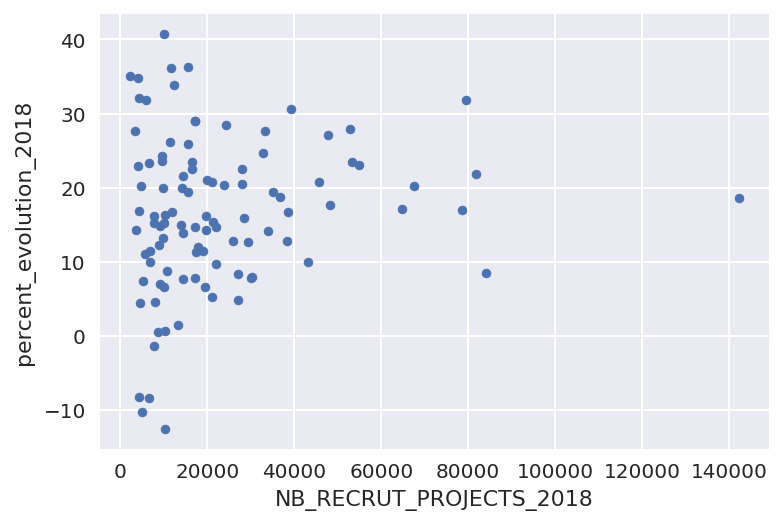

In [18]:
bmo_per_departement = bmo_evolution.groupby(['DEPARTEMENT_CODE', 'DEPARTEMENT_NAME']).sum()
bmo_per_departement['evolution_2018'] = bmo_per_departement.NB_RECRUT_PROJECTS_2018.div(bmo_per_departement.NB_RECRUT_PROJECTS_2017)
bmo_per_departement['percent_evolution_2018'] = (bmo_per_departement.evolution_2018 - 1) * 100
bmo_per_departement.plot(kind='scatter', x='NB_RECRUT_PROJECTS_2018', y='percent_evolution_2018');


There are few outliers. Let's first check the départements with the most hiring to understand all the outliers on the right:

In [19]:
dimensions_2018 = ['percent_evolution_2018', 'NB_RECRUT_PROJECTS_2018']
bmo_per_departement.sort_values('NB_RECRUT_PROJECTS_2018', ascending=False)[dimensions_2018].head(8)

,,percent_evolution_2018,NB_RECRUT_PROJECTS_2018
DEPARTEMENT_CODE,DEPARTEMENT_NAME,,
75,PARIS,18.584912,142226.0
13,BOUCHES-DU-RHÔNE,8.437169,84067.0
69,RHÔNE,21.853762,81759.0
59,NORD,31.803262,79509.0
92,HAUTS-DE-SEINE,16.964538,78599.0
35,ILLE-ET-VILAINE,20.221163,67622.0
33,GIRONDE,17.143167,64861.0
06,ALPES-MARITIMES,23.105891,54920.0


Obviously Paris is way bigger than the rest but still has a very strong evolution (+18.6%). The other ones are all in large cities and metropolitan areas which correlates the [France Stratégie report](http://www.strategie.gouv.fr/publications/dynamique-de-lemploi-metropoles-territoires-avoisinants).

Now let's check the extreme changes:

In [20]:
extreme_changes_2018 = bmo_per_departement.sort_values('percent_evolution_2018', ascending=False)\
    [dimensions_2018]
display(extreme_changes_2018.head())
extreme_changes_2018.tail()

,,percent_evolution_2018,NB_RECRUT_PROJECTS_2018
DEPARTEMENT_CODE,DEPARTEMENT_NAME,,
53,MAYENNE,40.795328,10126.0
50,MANCHE,36.272615,15516.0
16,CHARENTE,36.081144,11605.0
23,CREUSE,35.079459,2295.0
52,HAUTE-MARNE,34.768101,4039.0


,,percent_evolution_2018,NB_RECRUT_PROJECTS_2018
DEPARTEMENT_CODE,DEPARTEMENT_NAME,,
89,YONNE,-1.332149,7777.0
58,NIÈVRE,-8.207527,4317.0
39,JURA,-8.415435,6693.0
973,MARTINIQUE,-10.297857,4939.0
971,GUADELOUPE,-12.550710,10347.0


Nice, a lot of départements ~1h30 train away from Paris are growing a lot (although they might have had a bad year in 2017). On the bottom, we find some DOM départements again. This is a bit depressing to see that the situation that is not good is getting even worse. :-(

### Evolution by Job Family

Show the distribution of hiring growth and volumes for job families:

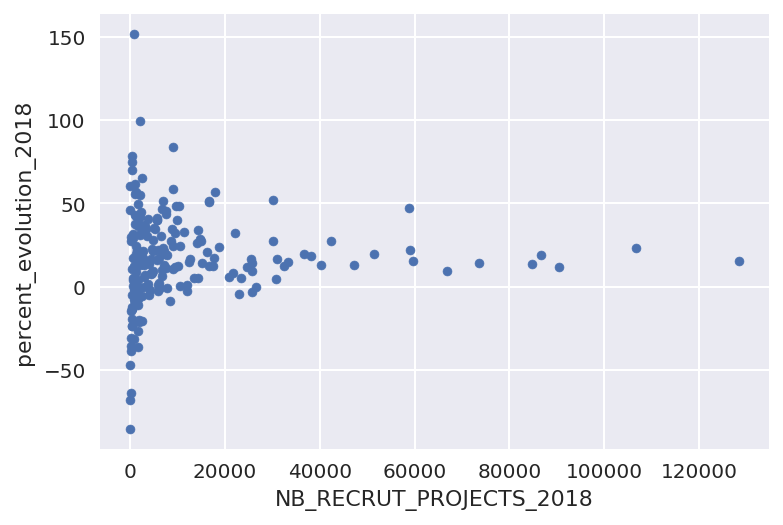

In [21]:
bmo_per_fap = bmo_evolution.groupby(['FAP_CODE', 'FAP_NAME']).sum()
bmo_per_fap['evolution_2018'] = bmo_per_fap.NB_RECRUT_PROJECTS_2018.div(bmo_per_fap.NB_RECRUT_PROJECTS_2017)
bmo_per_fap['percent_evolution_2018'] = (bmo_per_fap.evolution_2018 - 1) * 100
bmo_per_fap.plot(kind='scatter', x='NB_RECRUT_PROJECTS_2018', y='percent_evolution_2018');

A first conclusion is that only job families with few hiring have huge evolutions. However let's look at the job family that got +150%.

In [22]:
bmo_per_fap.sort_values('percent_evolution_2018', ascending=False)[dimensions_2018].head()

,,percent_evolution_2018,NB_RECRUT_PROJECTS_2018
FAP_CODE,FAP_NAME,,
G0A42,Mainteniciens en biens électrodomestiques,152.103560,779.0
E0Z22,"Ouvriers non qualifiés en métallurgie, verre, céramique et matériaux de construction",99.802176,2020.0
D0Z20,Ouvriers non qualifiés travaillant par enlèvement ou formage de métal,83.943834,9039.0
J6Z91,Personnels navigants de l'aviation (techniques et commerciaux),78.534031,341.0
C2Z71,Dessinateurs en électricité et en électronique,74.693878,428.0


So "domotics" is a real hype in 2018…

Let's check the distribution again only focusing on job families with more than 20k hires in the year:

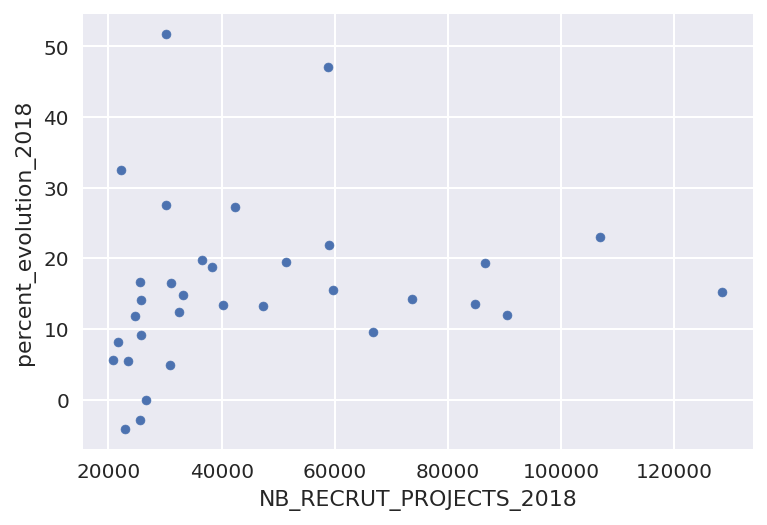

In [23]:
bmo_per_large_fap = bmo_per_fap[bmo_per_fap.NB_RECRUT_PROJECTS_2018 >= 20000]
bmo_per_large_fap.plot(kind='scatter', x='NB_RECRUT_PROJECTS_2018', y='percent_evolution_2018');

That looks reasonnable, let's check top growth:

In [24]:
bmo_per_large_fap.sort_values('percent_evolution_2018', ascending=False)[dimensions_2018].head()

,,percent_evolution_2018,NB_RECRUT_PROJECTS_2018
FAP_CODE,FAP_NAME,,
J3Z43,Conducteurs routiers et grands routiers,51.811831,30206.0
R0Z60,Employés de libre-service,47.105533,58726.0
B3Z20,Ouvriers non qualifiés du second oeuvre du bâtiment,32.519596,22148.0
J3Z42,Conducteurs et livreurs sur courte distance,27.501587,30135.0
M2Z90,"Ingénieurs et cadres d'études, R et D en informatique, chefs de projets informatiques",27.233455,42412.0


It looks like drivers are not a things of the past yet…

## Conclusion

So BMO 2018 data looks pretty good and after a quick clean-up we were able to compare it with the previous years (2014, 2015, 2016 & 2017).

Some high level insights can be deduced from comparing these datasets. For instance, hiring is in really good shape in Paris, and in main metropolitan areas. Also hiring is going really well for transportation drivers as well as, ironically, self-service shops.

Possible next steps:
* compare 2017 -> 2018 evolution with the evolution from 2016 -> 2017.
* go more local and understand at the "bassin d'emploi" level the local dynamics. E.g. find where a local decrease is compensated by a local increase next door so that we could advise our users to commute a bit more.
* compare flux and stock: the BMO is mixing new hires and replacements, but if we had a dataset with the number of currently employed persons we could distinguish local markets that are booming, and the ones that are becoming less stable (more hiring, but more firing as well).